In [1]:
import sys
import random
sys.path.append("../")
from pprint import pprint
from Core.maze import Maze

# The Binary Tree Algorithm
## How does it work?
The binary tree algorithm is a fairly simple algorithm. Consider any node and randomly choose either left or up and carve a path in that direction. Now we do this for every single node.
## Is every node connected?
Yes every node is connected. We know that for every node we make a decision to go left or to go up. It is trivial to conclude that all the nodes in the first row and first column are connected as they can only go left and up respectively. For the rest of the nodes, we observe that they'll eventually connect to one of these long passages. The algorithm derives its name from the fact that the maze is a binary tree rooted at (0, 0).

In [2]:
def BinaryTree(maze):
    # Start from 0, 0 and create maze using binary tree algorithm
    # Iterate over every node and carve a path to the north or west
    for x in range(0, maze.num_rows):
        for y in range(0, maze.num_columns):
            temp = []
            # Check if west is valid
            if x > 0:
                temp.append('W')
            # Check if north is valid
            if y > 0:
                temp.append('N')
            # If neither are valid skip
            if len(temp) == 0:
                continue
            # Choose a random valid direction and carve a path in that direction
            direction = random.randint(0, len(temp)-1)
            maze.add_path((x, y), temp[direction], 0)

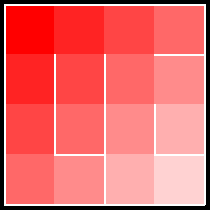

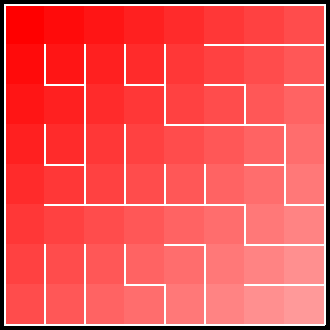

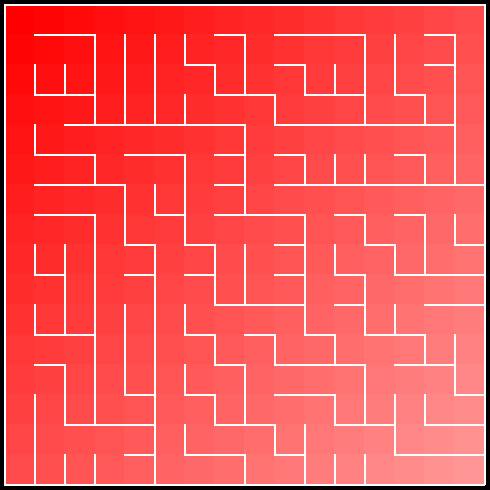

In [5]:
maze = Maze(4, 4)
BinaryTree(maze)
maze.add_colors()
display(maze.draw())

maze = Maze(8, 8)
BinaryTree(maze)
maze.add_colors()
display(maze.draw(cell_width=40))

maze = Maze(16, 16)
BinaryTree(maze)
maze.add_colors()
display(maze.draw(cell_width=30))

## Basic Analysis
Seeing as this is a very basic algorithm and we haven't created tools to analyse our algorithms yet, I put together a couple very obvious things.  
### Time Complexity : O(N<sup>2</sup>)  
N is the upper bound on the number of rows/columns. Seeing as we do only one pass over the grid in the maze class we iterate over each node only once.
### Additional Space : O(1)  
We do not have any sizable additional space requirements. The only variable we use in the function is the temp variable that stores directions.
### Bias :  
There is a clear bias in the maze (that we can see with our own eyes) The paths all appear to flow towards the top left corner. There is also two long straight paths that run along the west and north edges. This is simply because the top left corner is the root of the binary tree that the mazes can be represented as. We can simply move up and left until we reach the root and then travel towards our objective. This maze will not perform very well against human solvers but algorithms will be indifferent to this bias (maybe?).

In [18]:
total = {"Deadends": 0, "Straightways": 0, "LeftTurns": 0, "RightTurns": 0, "Junctions": 0, "Crossroads": 0}
for i in range(0, 100):
    maze = Maze(100, 100)
    BinaryTree(maze)
    partial = maze.benchmark()
    total["Deadends"] += partial["Deadends"]
    total["Straightways"] += partial["Straightways"]
    total["LeftTurns"] += partial["LeftTurns"]
    total["RightTurns"] += partial["RightTurns"]
    total["Junctions"] += partial["Junctions"]
    total["Crossroads"] += partial["Crossroads"]

div = 0
for i in total:
    div += total[i]

for i in total:
    total[i] /= div
    total[i] *= 100
    round(total[i], 3)

for i in total:
    print("%12s %s %3f" % (i, " : ", total[i]))

    Deadends  :  25.096400
Straightways  :  25.342200
   LeftTurns  :  12.226600
  RightTurns  :  12.258400
   Junctions  :  25.076400
  Crossroads  :  0.000000


### Further analysis
Looking at the above results, we can see that there doesn't seem to be any evident preference towards left or right turns. 25% of all nodes are dead ends, which is a pretty high percentage, and the number of straightways are roughly equal to to the number of dead ends. Neglecting the clear northwest to southeast bias, we have a pretty good distribution of types of nodes. This kind of maze would be perfect for a situation where we have a large and central 'common area' (the north-west corner), and multiple branches from this place. Dungeon crawler video games with a respawn point could potentially use this type of maze to achieve a rather convoluted but rooted map.